In [93]:
import cv2
import pytesseract
import numpy as np
import math
from pytesseract import Output
import matplotlib.pyplot as plt

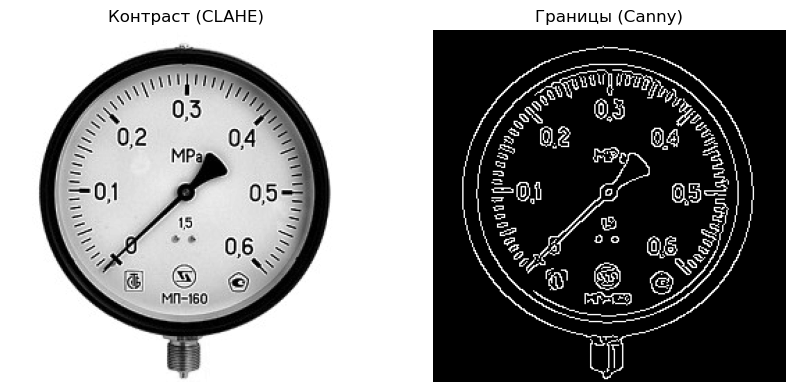

In [94]:
# Загрузка изображения
image_path = "manometer.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Повышение контраста с CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_clahe = clahe.apply(gray)

# Гауссово размытие
blurred = cv2.GaussianBlur(gray_clahe, (5, 5), 0)

# Поиск границ
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Отображение результата
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Контраст (CLAHE)")
plt.imshow(gray_clahe, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Границы (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.show()

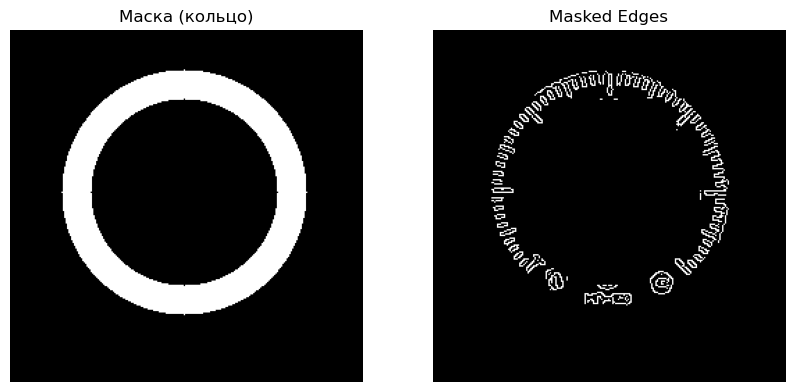

In [95]:
# Поиск окружности шкалы
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=100, param2=30, minRadius=50, maxRadius=150)

if circles is not None:
    cx, cy, r = np.uint16(np.around(circles[0][0]))
    center = (cx, cy)

    # Маска в форме кольца
    mask = np.zeros_like(gray)
    cv2.circle(mask, center, int(r * 0.85), 255, -1)  # внешний радиус
    cv2.circle(mask, center, int(r * 0.65), 0, -1)    # внутренний вырез

    # Применение маски
    masked_edges = cv2.bitwise_and(edges, edges, mask=mask)

    # Отображение маски и результата
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Маска (кольцо)")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Masked Edges")
    plt.imshow(masked_edges, cmap='gray')
    plt.axis("off")
    plt.show()

else:
    print("❌ Циферблат не найден.")

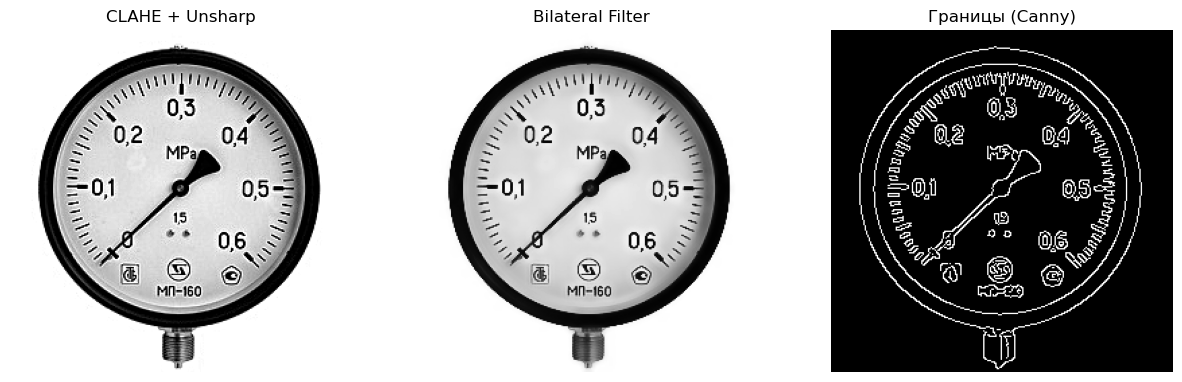

In [96]:
# Загрузка изображения
image_path = "manometer.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_clahe = clahe.apply(gray)

# Unsharp mask (резкость)
gaussian = cv2.GaussianBlur(gray_clahe, (9, 9), 10.0)
unsharp = cv2.addWeighted(gray_clahe, 1.5, gaussian, -0.5, 0)

# Bilateral filter (сохраняет границы)
bilateral = cv2.bilateralFilter(unsharp, d=9, sigmaColor=75, sigmaSpace=75)

# Гауссово размытие перед Canny
blurred = cv2.GaussianBlur(bilateral, (5, 5), 0)

# Поиск границ
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Отображение результатов
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.title("CLAHE + Unsharp")
plt.imshow(unsharp, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Bilateral Filter")
plt.imshow(bilateral, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Границы (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.show()

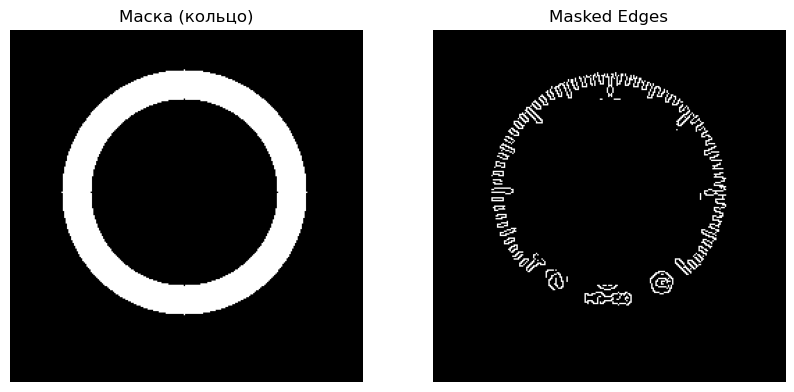

In [97]:
# Поиск окружности шкалы
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=100, param2=30, minRadius=50, maxRadius=150)

if circles is not None:
    cx, cy, r = np.uint16(np.around(circles[0][0]))
    center = (cx, cy)

    # Маска в форме кольца
    mask = np.zeros_like(gray)
    cv2.circle(mask, center, int(r * 0.85), 255, -1)  # внешний радиус
    cv2.circle(mask, center, int(r * 0.65), 0, -1)    # внутренний вырез

    # Применение маски
    masked_edges = cv2.bitwise_and(edges, edges, mask=mask)

    # Отображение маски и результата
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Маска (кольцо)")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Masked Edges")
    plt.imshow(masked_edges, cmap='gray')
    plt.axis("off")
    plt.show()

else:
    print("❌ Циферблат не найден.")

In [98]:
cx, cy, r = np.uint16(np.around(circles[0][0]))
center = (cx, cy)

In [99]:
# Преобразуем в чёрно-белое (градации серого уже есть) — усилим бинаризацией
_, binary = cv2.threshold(bilateral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [100]:
# Маска в виде кольца
mask = np.zeros_like(binary)
cv2.circle(mask, center, int(r * 0.83), 255, -1)
cv2.circle(mask, center, int(r * 0.72), 0, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
# Применим маску
masked_binary = cv2.bitwise_and(binary, binary, mask=mask)

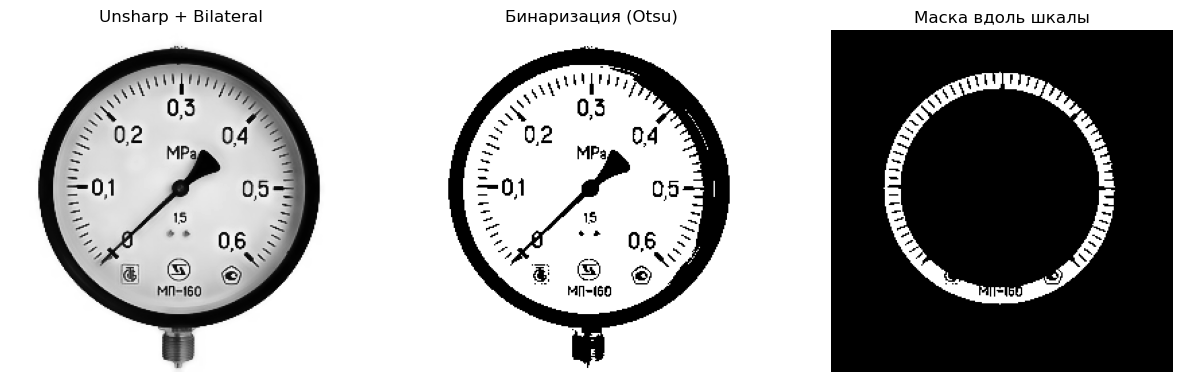

In [102]:
# Отображение
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Unsharp + Bilateral")
plt.imshow(bilateral, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Бинаризация (Otsu)")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Маска вдоль шкалы")
plt.imshow(masked_binary, cmap="gray")
plt.axis("off")
plt.show()


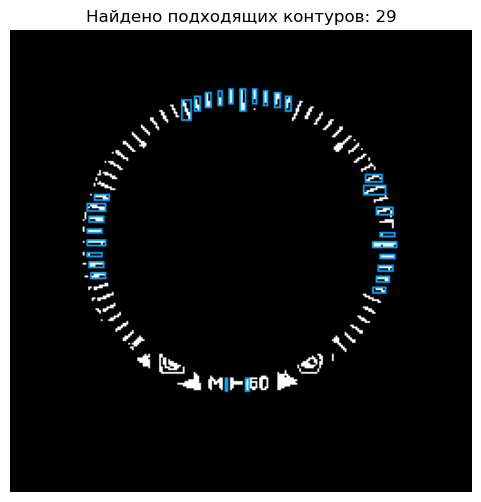

In [103]:
# Используем адаптивную бинаризацию (инвертируем цвета: деления — белые)
binary_adaptive = cv2.adaptiveThreshold(
    bilateral, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV, blockSize=11, C=2
)

# Применим маску
masked_adaptive = cv2.bitwise_and(binary_adaptive, binary_adaptive, mask=mask)

# Найдём контуры
contours, _ = cv2.findContours(masked_adaptive, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отобразим найденные контуры
contour_vis = cv2.cvtColor(masked_adaptive, cv2.COLOR_GRAY2BGR)
cnt_count = 0

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = max(w, h) / (min(w, h) + 1e-6)

    # Фильтр по размеру и форме
    if 5 < max(w, h) < 25 and aspect_ratio > 2:
        cv2.rectangle(contour_vis, (x, y), (x + w, y + h), (0, 165, 255), 1)
        cnt_count += 1

# Отображение результата
plt.figure(figsize=(6, 6))
plt.title(f"Найдено подходящих контуров: {cnt_count}")
plt.imshow(contour_vis)
plt.axis("off")
plt.show()

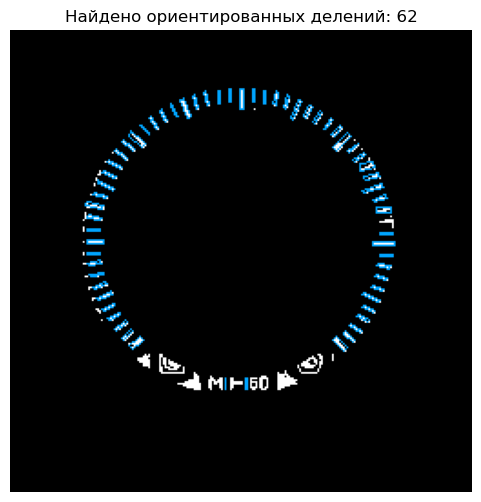

In [104]:
# Копия для отрисовки
rotated_vis = cv2.cvtColor(masked_adaptive, cv2.COLOR_GRAY2BGR)
cnt_rotated = 0

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    (x_center, y_center), (w, h), angle = rect

    # Отбрасываем слишком маленькие
    if max(w, h) < 5 or max(w, h) > 25:
        continue

    aspect_ratio = max(w, h) / (min(w, h) + 1e-6)

    # Фильтр по форме (удлинённые) и углу (вблизи ±90 — радиальные)
    if aspect_ratio > 2 and (abs(angle) > 40 or abs(angle) < 40):
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(rotated_vis, [box], 0, (0, 165, 255), 1)
        cnt_rotated += 1

# Отображение
plt.figure(figsize=(6, 6))
plt.title(f"Найдено ориентированных делений: {cnt_rotated}")
plt.imshow(rotated_vis)
plt.axis("off")
plt.show()

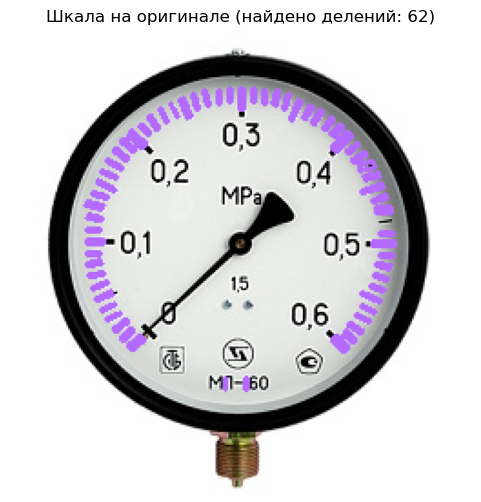

In [105]:
# Отрисовка шкалы на оригинальном изображении
scale_overlay = image.copy()
cnt_highlighted = 0

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    (x_center, y_center), (w, h), angle = rect

    if max(w, h) < 5 or max(w, h) > 25:
        continue

    aspect_ratio = max(w, h) / (min(w, h) + 1e-6)
    if aspect_ratio > 2 and (abs(angle) > 40 or abs(angle) < 40):
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(scale_overlay, [box], 0, (255, 105, 180), 2)  # Розовый
        cnt_highlighted += 1

# Отображение результата
plt.figure(figsize=(6, 6))
plt.title(f"Шкала на оригинале (найдено делений: {cnt_highlighted})")
plt.imshow(cv2.cvtColor(scale_overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [106]:
tick_angles = []

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    (x_center, y_center), (w, h), angle = rect

    if max(w, h) < 5 or max(w, h) > 25:
        continue

    aspect_ratio = max(w, h) / (min(w, h) + 1e-6)
    if aspect_ratio > 2 and (abs(angle) > 40 or abs(angle) < 40):
        # Вычисляем угол между вектором (x_center - cx, cy - y_center)
        dx = x_center - cx
        dy = cy - y_center  # Важно! ось Y в изображении вниз
        theta = np.degrees(np.arctan2(dy, dx)) % 360
        tick_angles.append(theta)

In [107]:
tick_angles = sorted(tick_angles)

In [108]:
tick_gaps = np.diff(tick_angles + [tick_angles[0] + 360])  # замыкаем круг

In [109]:
mean_gap = np.mean(tick_gaps)
std_gap = np.std(tick_gaps)

# Пример: если расстояние отличается от среднего более чем на 1.5 std
anomalies = [i for i, gap in enumerate(tick_gaps)
             if abs(gap - mean_gap) > 1.5 * std_gap]

In [110]:
for i in anomalies:
    a1 = tick_angles[i]
    a2 = tick_angles[(i + 1) % len(tick_angles)]

    # Нарисуем дугу или метку между этими двумя делениями
    print(f"Аномальный угол между делениями: {a1:.2f}° -> {a2:.2f}° ({tick_gaps[i]:.2f}°)")
    anomalies

Аномальный угол между делениями: 224.48° -> 264.81° (40.32°)
Аномальный угол между делениями: 273.34° -> 315.51° (42.17°)


In [111]:
# Преобразование угла в координаты
def angle_to_point(angle_deg, center, radius):
    angle_rad = np.radians(angle_deg)
    x = int(center[0] + radius * np.cos(angle_rad))
    y = int(center[1] - radius * np.sin(angle_rad))
    return (x, y)

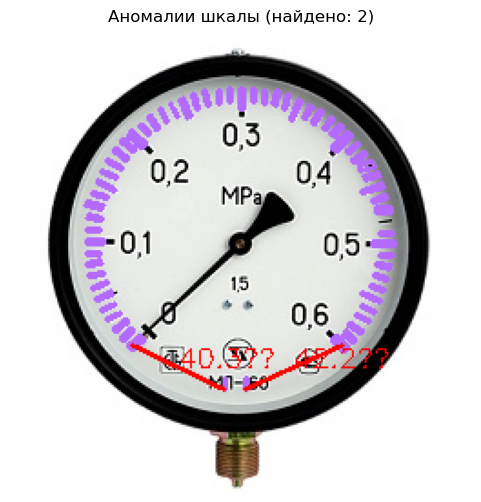

In [112]:
# Отрисовка аномалий на шкале
for i in anomalies:
    a1 = tick_angles[i]
    a2 = tick_angles[(i + 1) % len(tick_angles)]

    p1 = angle_to_point(a1, (cx, cy), r * 0.78)
    p2 = angle_to_point(a2, (cx, cy), r * 0.78)

    cv2.line(scale_overlay, p1, p2, (0, 0, 255), 2)

    mid_x = (p1[0] + p2[0]) // 2
    mid_y = (p1[1] + p2[1]) // 2
    cv2.putText(scale_overlay, f"{tick_gaps[i]:.1f}°", (mid_x, mid_y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Отображение
plt.figure(figsize=(6, 6))
plt.title(f"Аномалии шкалы (найдено: {len(anomalies)})")
plt.imshow(cv2.cvtColor(scale_overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [113]:
# Пусть tick_angles отсортирован по возрастанию (0..360), замкнутая шкала
angle_diffs = np.diff(tick_angles + [tick_angles[0] + 360])  # чтобы учесть последний сегмент

# Найдём аномалию
threshold = 3 * np.median(angle_diffs)
anomalies = [i for i, d in enumerate(angle_diffs) if d > threshold]

In [114]:
anomalies

[49, 51]

In [115]:
if len(anomalies) >= 2:
    i1, i2 = anomalies[:2]  # предполагаем, что подряд
else:
    print("Недостаточно аномалий найдено.")
    i1, i2 = 0, 1  # заглушка

In [116]:
# Определим границы "дырки"
gap = 10
angle_start = tick_angles[i1] + gap
angle_end = tick_angles[(i2 + 1) % len(tick_angles)] - gap

In [117]:
angle_start

234.48151221537415

In [118]:
angle_end

305.5138497163541

In [119]:
# Обеспечим корректный диапазон
if angle_end < angle_start:
    angle_end += 360  # учли переход через 0

In [120]:
tick_points = []

for angle in tick_angles:
    angle_rad = np.deg2rad(angle)
    x = int(cx + r * 0.78 * np.cos(angle_rad))
    y = int(cy - r * 0.78 * np.sin(angle_rad))
    tick_points.append((x, y))

In [121]:
# Фильтруем деления
filtered_angles = []
filtered_points = []

for angle, point in zip(tick_angles, tick_points):
    a = angle
    if a < angle_start:
        a += 360  # тот же переход

    if not (angle_start <= a <= angle_end):
        filtered_angles.append(angle)
        filtered_points.append(point)

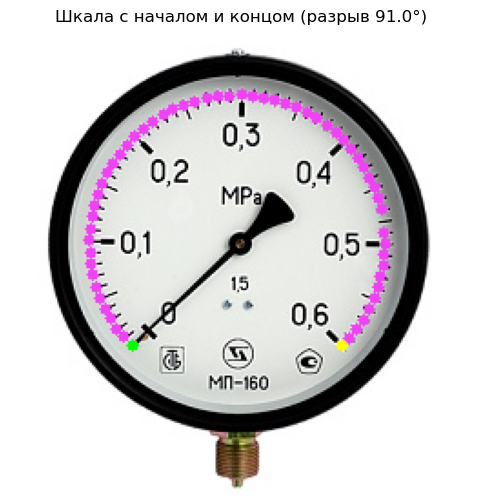

In [125]:
# Найдём самое большое расстояние между соседними углами
max_gap = 0
start_idx = 0
for i in range(len(filtered_angles)):
    a1 = filtered_angles[i]
    a2 = filtered_angles[(i + 1) % len(filtered_angles)]
    gap = (a2 - a1) % 360
    if gap > max_gap:
        max_gap = gap
        start_idx = (i + 1) % len(filtered_angles)  # начало после разрыва

end_idx = start_idx - 1 if start_idx != 0 else len(filtered_angles) - 1

# Координаты начала и конца шкалы
start_point = filtered_points[start_idx]
end_point = filtered_points[end_idx]

# Отрисовка шкалы на оригинальном изображении
scale_overlay = image.copy()

# Отрисовка всех делений (розовым)
for pt in filtered_points:
    cv2.circle(scale_overlay, pt, 3, (245, 66, 239), -1)

# Жёлтый круг — начало шкалы
cv2.circle(scale_overlay, start_point, 3, (0, 255, 255), -1)
#cv2.putText(scale_overlay, "END", (start_point[0] + 5, start_point[1]), 
#            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Оранжевый круг — конец шкалы
cv2.circle(scale_overlay, end_point, 3, (0, 255, 0), -1)
#cv2.putText(scale_overlay, "START", (end_point[0] + 5, end_point[1]), 
#            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Отображение
plt.figure(figsize=(6, 6))
plt.title(f"Шкала с началом и концом (разрыв {max_gap:.1f}°)")
plt.imshow(cv2.cvtColor(scale_overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

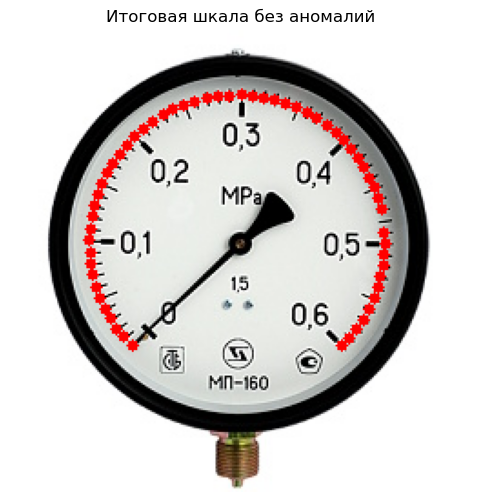

In [123]:
# Отрисовка
result = image.copy()
for (x, y) in filtered_points:
    cv2.circle(result, (x, y), 3, (0, 0, 255), -1)  # Красные точки

# Визуализация
plt.figure(figsize=(6, 6))
plt.title("Итоговая шкала без аномалий")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()